In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [2]:
# Define Path
path = r'C:\Users\18478\OneDrive\Desktop\Career Foundry Data Analytics Course\Career Foundry Machine Learning'

In [3]:
# Import Weather Data Set
df = pd.read_pickle(os.path.join(path, 'Data Sets', 'df_weather_prediction_scaled.pkl'))

In [4]:
# Import Pleasant Weather Data
df_pleasant = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [5]:
#dropping unrelated station data from main dataset
df_active=df.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [6]:
df_active.head()

id      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0   0  19600101      1           0.660514          -0.02793        0.826097   
1   1  19600102      1           0.244897          -0.02793        0.735760   
2   2  19600103      1           1.076130          -0.02793        1.277781   
3   3  19600104      1          -1.001953          -0.02793        1.458455   
4   4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0         -0.179228  ...             -0.443701           0.761754   
1         -0.179228  ...              0.783085           1.183580   
2         -0.179228  ...              0.783085           1.183580   
3         -0.179228  ...              0.783085           0.480538   
4         -0.179228  ...             -1.670486          -0.363113   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0          -1.299744                  -0.806427               -0.088407   
1          -1.262455                  -1.042055                0.503361   
2          -0.432779                  -1.136306               -0.396127   
3           0.387574                  -1.183432                0.669056   
4           1.729970                  -0.794645               -0.490810   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0            -0.024706           0.372147           -0.668215   
1            -0.024706          -0.829285           -0.548046   
2            -0.024706          -1.009500           -0.067372   
3            -0.024706          -1.039536           -0.998679   
4            -0.024706           0.672505           -1.509396   

   VALENTIA_temp_min  VALENTIA_temp_max  
0          -0.519743          -0.752237  
1          -0.629054          -0.407141  
2           0.054135          -0.177078  
3          -0.164486          -0.838511  
4          -1.339569          -1.471186  

[5 rows x 150 columns]

In [7]:
df_active = df.drop(columns=['id'])

In [8]:
df_active.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0         -0.179228       -0.902918  ...             -0.443701   
1         -0.179228       -0.810126  ...              0.783085   
2         -0.179228       -1.065304  ...              0.783085   
3         -0.179228       -0.114186  ...              0.783085   
4         -0.179228        0.187388  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 170 columns]

In [30]:
df_pleasant.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [9]:
#Create an 'X' and y df by dropping the unneeded columns.
X = df_active.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'],axis=1)

In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [11]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 168)
(5738, 168)
(17212, 15)
(5738, 15)


In [12]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

[Text(0.3703439006587646, 0.9827586206896551, 'x[49] <= 0.403\ngini = 0.314\nsamples = 17212\nvalue = [[12978, 4234]\n[11216, 5996]\n[11633, 5579]\n[13890, 3322]\n[13531, 3681]\n[13498, 3714]\n[14436, 2776]\n[12426, 4786]\n[13646, 3566]\n[9516, 7696]\n[13642, 3570]\n[14566, 2646]\n[17212, 0]\n[14295, 2917]\n[16349, 863]]'),
 Text(0.06596402106995244, 0.9482758620689655, 'x[105] <= -0.216\ngini = 0.099\nsamples = 10782\nvalue = [[10123.0, 659.0]\n[9060.0, 1722.0]\n[9508.0, 1274.0]\n[10694.0, 88.0]\n[10782.0, 0.0]\n[10156.0, 626.0]\n[10703.0, 79.0]\n[9831.0, 951.0]\n[10709.0, 73.0]\n[8020.0, 2762.0]\n[10373.0, 409.0]\n[10535.0, 247.0]\n[10782.0, 0.0]\n[10531.0, 251.0]\n[10618.0, 164.0]]'),
 Text(0.2181539608643585, 0.9655172413793103, 'True  '),
 Text(0.019105270491290943, 0.9137931034482759, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7547\nvalue = [[7428.0, 119.0]\n[6863.0, 684.0]\n[7197.0, 350.0]\n[7535.0, 12.0]\n[7547.0, 0.0]\n[7504.0, 43.0]\n[7525.0, 22.0]\n[7332.0, 215.0]\n[7523.0, 24

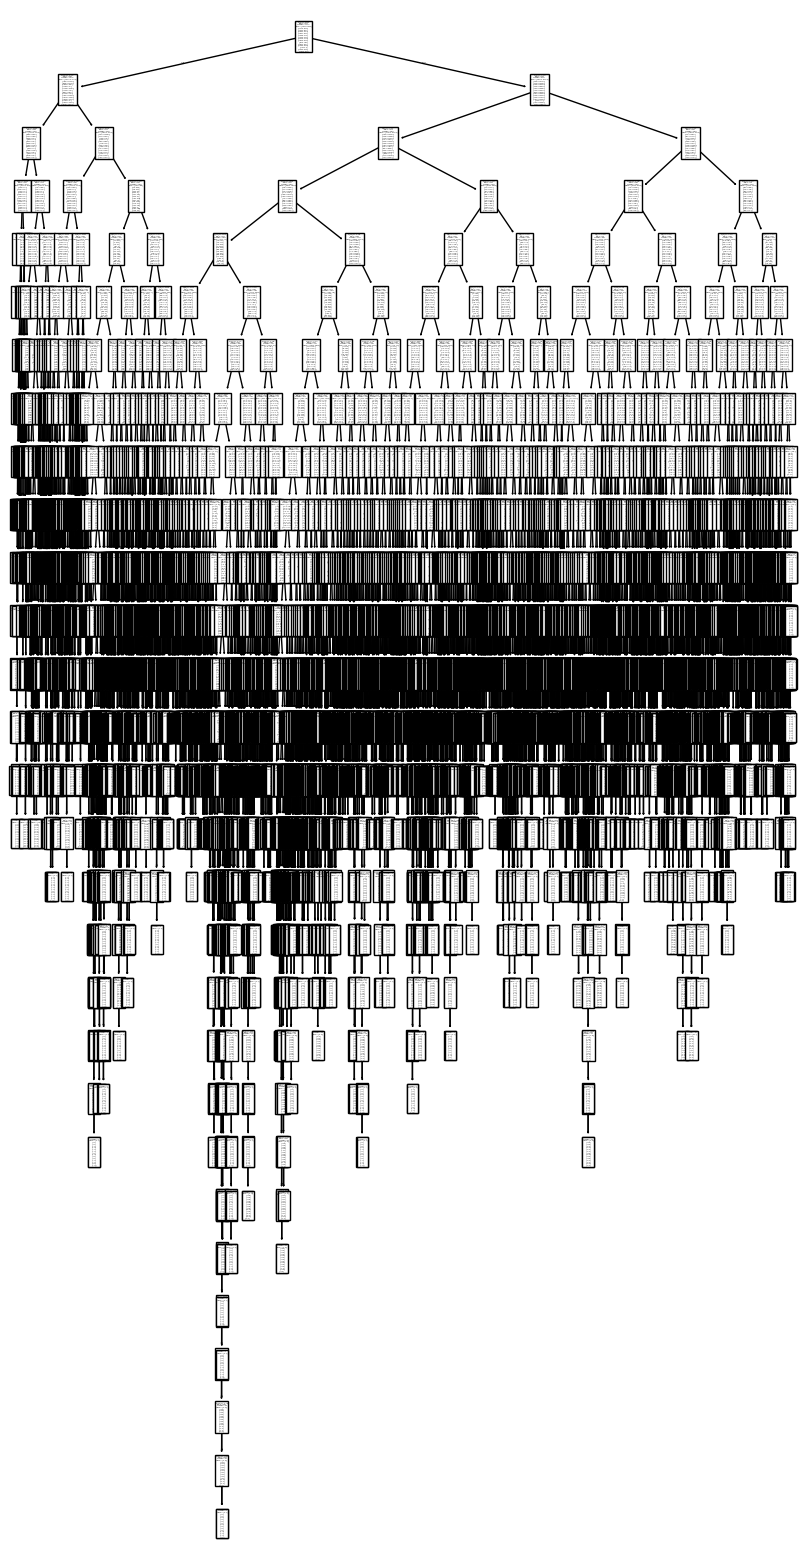

In [14]:
#Run Decision Tree classifier
active_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
active_dt.fit(X_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(active_dt)


In [15]:
#cross validation method
y_pred_train = active_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(active_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6063787376976219


In [16]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4234
           1       1.00      1.00      1.00      5996
           2       1.00      1.00      1.00      5579
           3       1.00      1.00      1.00      3322
           4       1.00      1.00      1.00      3681
           5       1.00      1.00      1.00      3714
           6       1.00      1.00      1.00      2776
           7       1.00      1.00      1.00      4786
           8       1.00      1.00      1.00      3566
           9       1.00      1.00      1.00      7696
          10       1.00      1.00      1.00      3570
          11       1.00      1.00      1.00      2646
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2917
          14       1.00      1.00      1.00       863

   micro avg       1.00      1.00      1.00     55346
   macro avg       0.93      0.93      0.93     55346
weighted avg       1.00   

C:\Users\18478\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\18478\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\18478\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\18478\anaconda3\Lib\site-package

In [17]:
locations = list({x.split("_")[0] for x in df_active.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'GDANSK', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'ROMA', 'SONNBLICK', 'STOCKHOLM', 'TOURS', 'VALENTIA']


In [33]:
locations.remove('GDANSK')
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'ROMA', 'SONNBLICK', 'STOCKHOLM', 'TOURS', 'VALENTIA']


In [34]:
locations.remove('ROMA')
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'TOURS', 'VALENTIA']


In [35]:
locations.remove('TOURS')
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [22]:
# Generate predictions on the test set
y_pred = active_dt.predict(X_test)

C:\Users\18478\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


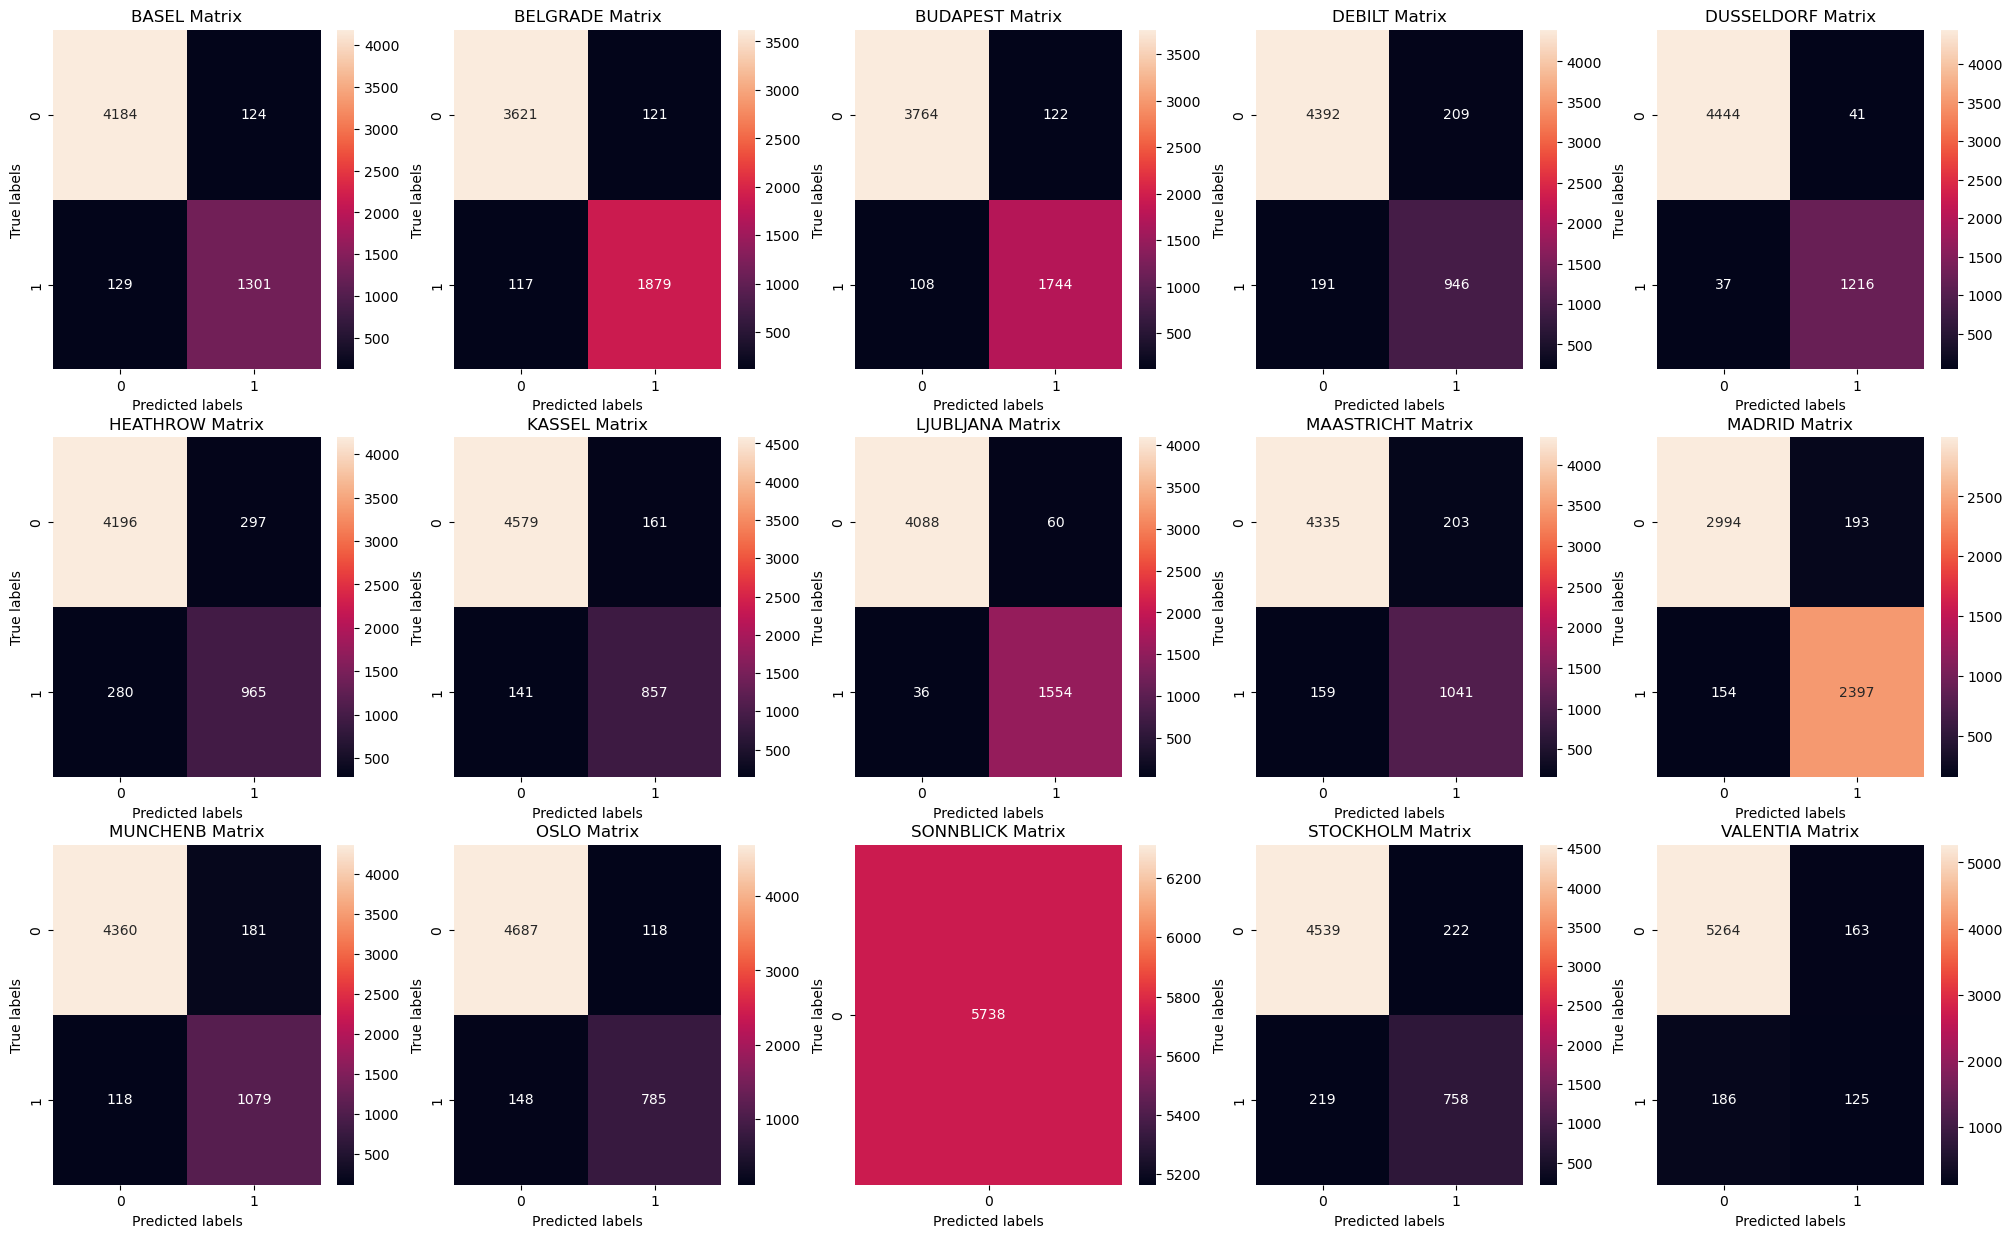

In [36]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1